# Random Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Power Spectral Density

The [power spectral density](https://en.wikipedia.org/wiki/Spectral_density#Power_spectral_density) (PSD) is defined as the Fourier transformation of the [auto-correlation function](correlation_functions.ipynb) (ACF).

### Definition

For a continuous-amplitude real-valued wide-sense stationary (WSS) random signal $x[k]$ the PSD is given as

\begin{equation}
\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \mathcal{F}_* \{ \varphi_{xx}[\kappa] \}
\end{equation}

where $\mathcal{F}_* \{ \cdot \}$ denotes the [discrete-time Fourier transformation](https://en.wikipedia.org/wiki/Discrete-time_Fourier_transform) (DTFT) and $\varphi_{xx}[\kappa]$ the ACF of $x[k]$. The ACF of a random signal of finite length $N$ can be expressed by way of a linear convolution

\begin{equation}
\varphi_{xx}[\kappa] = \frac{1}{N} \cdot x_N[k] * x_N[-k]
\end{equation}

Taking the DTFT of the left- and right-hand side results in

\begin{equation}
\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{1}{N} \, X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega})\, X_N(\mathrm{e}^{\,-\mathrm{j}\,\Omega}) = 
\frac{1}{N} \, | X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega}) |^2
\end{equation}

From this it can be concluded that the PSD quantifies the power per frequency of a random signal.

### Properties

The properties of the PSD can be deduced from the properties of the ACF and the DTFT as

1. From the symmetry of the ACF it follows that

    $$ \Phi_{xx}(\mathrm{e}^{\,\mathrm{j} \, \Omega}) = \Phi_{xx}(\mathrm{e}^{\,-\mathrm{j}\, \Omega}) $$

2. The quadratic mean of a random signal is given as

    $$ E\{ x[k]^2 \} = \varphi_{xx}[0] = \frac{1}{2\pi} \int\limits_{-\pi}^{\pi} \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\, \Omega}) \,\mathrm{d} \Omega $$

    The last relation can be found by introducing the definition of the inverse DTFT.

### Example

In this example the PSD $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j} \,\Omega})$ of a speech signal $x[k]$ is estimated by applying a discrete Fourier transformation (DFT) to its ACF. For a better interpretation of the PSD, the frequency axis $f = \frac{\Omega}{2 \pi} \cdot f_s$ has been chosen for illustration, where $f_s$ denotes the sampling frequency of the signal.

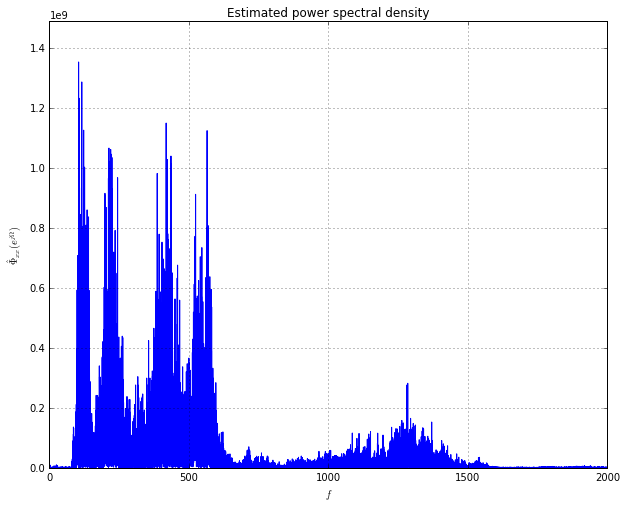

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# read audio file 
fs, x = wavfile.read('../data/speech_8k.wav')
x = np.asarray(x, dtype=float)

# compute ACF
acf = 1/len(x) * np.correlate(x, x, mode='full')
# compute PSD
psd = np.fft.rfft(acf)
f = fs/(2*len(x)) * np.arange(len(x))

# plot PSD
plt.figure(figsize = (10, 8))
plt.plot(f, np.abs(psd))
plt.title('Estimated power spectral density')
plt.ylabel(r'$\hat{\Phi}_{xx}(e^{j \Omega})$')
plt.xlabel(r'$f$')
plt.axis([0, 2000, 0, 1.1*max(np.abs(psd))]);
plt.grid()

**Exercise**

* What does the PSD tell you about the spectral contents of a speech signal?

It can be concluded from the shown PSD that the main power of a speech signal is contained in the frequency range below 500 Hz. The speech signal exhibits furthermore an harmonic structure with a dominant fundamental frequency and a number of harmonics.

## Cross-Power Spectral Density

The cross-power spectral density is defined as the Fourier transformation of the [cross-correlation function](correlation_functions.ipynb#Cross-Correlation-Function) (CCF). For two continuous-amplitude real-valued wide-sense stationary (WSS) random signals $x[k]$ and $y[k]$ the cross-power spectral density is given as

\begin{equation}
\Phi_{xy}(\mathrm{e}^{\,\mathrm{j} \, \Omega}) = \mathcal{F}_* \{ \varphi_{xy}[\kappa] \}
\end{equation}

where $\varphi_{xy}[\kappa]$ denotes the CCF of $x[k]$ and $y[k]$.

The symmetries of $\Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ can be derived from the symmetries of the CCF and the DTFT as

\begin{equation}
\underbrace {\Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \Phi_{xy}^*(\mathrm{e}^{-\,\mathrm{j}\, \Omega})}_{\varphi_{xy}[\kappa] \in \mathbb{R}} = 
\underbrace {\Phi_{yx}(\mathrm{e}^{\,- \mathrm{j}\, \Omega}) = \Phi_{yx}^*(\mathrm{e}^{\,\mathrm{j}\, \Omega})}_{\varphi_{yx}[-\kappa] \in \mathbb{R}}
\end{equation}

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016*.